**The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. For this assignment, the dataset will be used to train the model for predicting the price of the property in the market.**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

*Import the dataset:(the dataset should be placed in the same folder as the notebook)*

In [2]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
objects= ["date","street","city","statezip","country"]
for i in (objects):
    print(df[i].value_counts())
    print("-------------------------------------")

2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-05-11 00:00:00      2
2014-07-04 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64
-------------------------------------
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
1610 N 185th St          2
4507 Linden Ave N        2
19454 SE 27th Pl         2
                        ..
21909 NE 141st St        1
10872 SE 318th Pl        1
1447 21st Ave            1
901 N 97th St            1
996 SE 12th St           1
Name: street, Length: 4525, dtype: int64
-------------------------------------
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175


In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


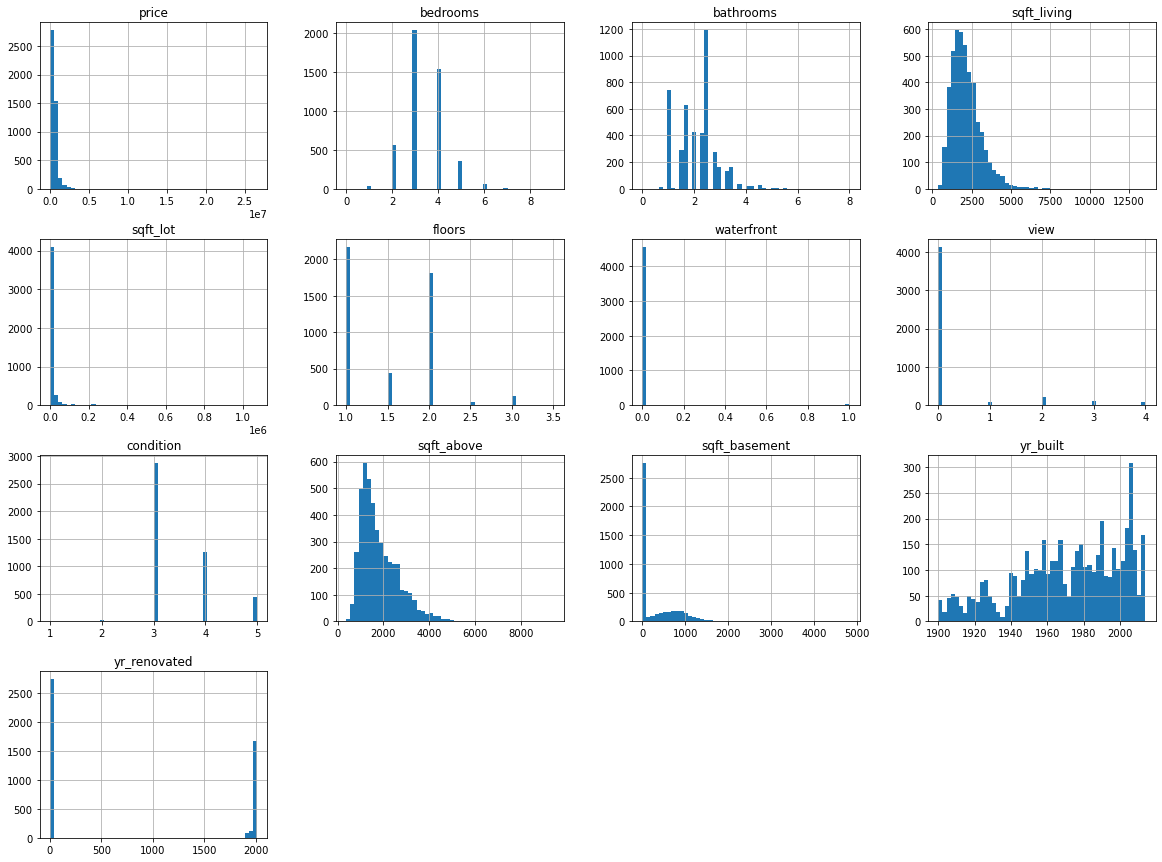

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

**drop certain columns for the ease of model building.
"date","street","city","statezip" will be dropped as these have too many unique values and leads to overfitting when creating dummy variables for them.
"country" will be dropped as it only has 1 unique value, and will contribute nothing to the predicting model.**

In [7]:
df = df.drop(columns=objects)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


# Create a Test Set

In [9]:
# to make this notebook's output identical at every run
np.random.seed(5)

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [11]:
test_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
240,630000.0,3.0,2.5,2680,327135,2.0,0,0,3,2680,0,1995,0
3878,305000.0,3.0,1.0,1580,7424,1.0,0,0,3,1010,570,1962,2003
818,433000.0,4.0,2.5,2280,7568,2.0,0,0,4,2280,0,2001,0
1877,275000.0,2.0,1.0,770,8149,1.0,0,0,5,770,0,1948,1985
2602,340000.0,3.0,2.5,1212,1174,3.0,0,0,3,1212,0,2004,2003


In [12]:
print(len(test_set))
print(len(train_set))

920
3680


# Looking for Correlations

In [13]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_above'>],
       [<AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='view', ylabel='b

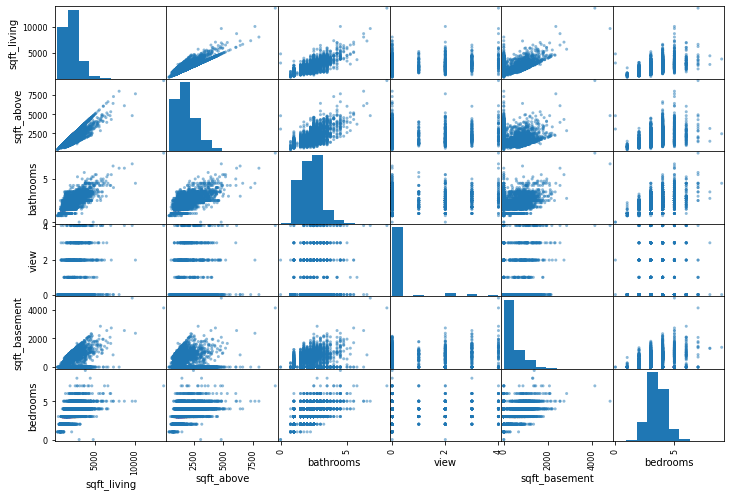

In [14]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["sqft_living", "sqft_above", "bathrooms",
              "view","sqft_basement","bedrooms"]
scatter_matrix(df[attributes], figsize=(12, 8))

# Experimenting with Attribute Combinations


In [15]:
df["average_bedrooms_per_floor"] = df["bedrooms"]/df["floors"]
df["average_bathrooms_per_floor"] = df["bathrooms"]/df["floors"]
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                          1.000000
sqft_living                    0.430410
sqft_above                     0.367570
bathrooms                      0.327110
view                           0.228504
sqft_basement                  0.210427
bedrooms                       0.200336
average_bathrooms_per_floor    0.164517
floors                         0.151461
waterfront                     0.135648
sqft_lot                       0.050451
condition                      0.034915
yr_built                       0.021857
average_bedrooms_per_floor    -0.011099
yr_renovated                  -0.028774
Name: price, dtype: float64

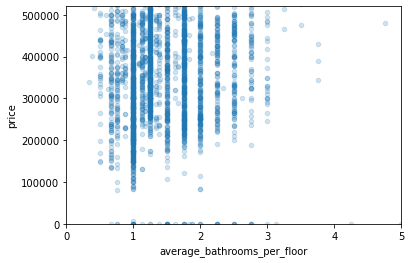

In [16]:
df.plot(kind="scatter", x="average_bathrooms_per_floor", y="price",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the Data for Machine Learning Algorithms

In [17]:
# select certain features that have higher correlation with the target variable
#feature_drop = ["average_bathrooms_per_floor","floors","waterfront","sqft_lot","condition","yr_built",
#               "average_bedrooms_per_floor","yr_renovated"]
#df = df.drop(columns=feature_drop)

In [18]:
train = train_set.drop("price", axis=1) # drop labels for training set
train_label = train_set["price"].copy()
test = test_set.drop("price", axis=1)
test_label = test_set["price"].copy()

# Training and Evaluating on the Training Set

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, train_label)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(train)
lin_mse = mean_squared_error(train_label, predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

545117.590284742

In [39]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_label, predictions)
lin_mae

173465.85288390823

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=5)
tree_reg.fit(train, train_label)

DecisionTreeRegressor(random_state=5)

In [41]:
predictions1 = tree_reg.predict(train)
tree_mse = mean_squared_error(train_label, predictions1)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

819.4518647825827

# Better Evaluation Using Cross-Validation


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train, train_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 345057.49063495 1404936.73888411  739553.58964278  760124.01670234
  329695.3763266   367859.4292219   386545.66487288  362828.23748199
  404481.39438277  409234.60191713]
Mean: 551031.6540067454
Standard deviation: 322093.27022614743


In [43]:
lin_scores = cross_val_score(lin_reg,  train, train_label,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 222884.82985982 1401079.99939254  696254.97852188  273823.02700454
  230968.51033193  277366.34191425  273062.1003585   267298.67403121
  323064.0939827   212713.52099128]
Mean: 417851.6076388649
Standard deviation: 353887.08372393105


In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=5)
forest_reg.fit(train, train_label)

housing_predictions2 = forest_reg.predict(train)
forest_mse = mean_squared_error(train_label, housing_predictions2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_scores = cross_val_score(forest_reg, train, train_label,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 248500.71832445 1402561.21200057  740759.65745925  742513.13358615
  383641.13834899  283088.17240021  447248.68242076  277716.23906394
  365662.25256853  258315.00256951]
Mean: 515000.6208742374
Standard deviation: 343749.53706650395


# Fine-tuning of the model

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [5, 10, 50,100], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=5)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train, train_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [5, 10, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [28]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 100}

In [29]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, random_state=5)

In [30]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03136176, 0.10564879, 0.23066356, 0.11091413, 0.02435132,
       0.00814519, 0.02384631, 0.05204745, 0.17420605, 0.0631691 ,
       0.14496293, 0.03068342])

In [36]:
importance = pd.DataFrame(list(zip(df.columns,feature_importances)),columns=
             ['predictor','feature importance'])
print(importance.sort_values(by=['feature importance'],ascending = False).head(5))

        predictor  feature importance
2       bathrooms            0.230664
8       condition            0.174206
10  sqft_basement            0.144963
3     sqft_living            0.110914
1        bedrooms            0.105649
